In [1]:
import sys
from PIL import Image, ImageDraw, ImageFilter
import random
import numpy as np

In [661]:
class ArtGenerator():
    """An ArtGenerator object has a main attribute: self.img 
    * When the object is created self.img is set as a clean image.
    This "base image" will have background color and dimensions according to args in __init__
    * Methods to draw shapes with random characteristics (position, length, quantity, size, etc.) in self.img:
        - draw_vertical_lines
        - draw_horizontal_lines
        - draw_diagonal_lines
        - draw_regular_polygon
        - draw_line
        - draw_arc
        - draw_ellipse
        - draw_points
    * Methods to add special effects or change the background of self.img: 
        - alter_background
        - add_curve_effect
        - smooth_lines
    """

    
    def __init__(self, bg_type = 'white', img_size = (600,400)):
        """initialize object and creates the base image
        * The image backgorund color will be selected according to "bg_type",
        bg_type 'light' or 'dark' creates a random background color
        
        Keyword arguments:
        bg_type -- Define the backgorund color, may be 'white','black', 'light' or 'dark' 
        img_size -- A 2-tuple, containing (width, height) in pixels
        """
        self.bg_type = bg_type
        
        # Set background colors according to "bg_type"
        if bg_type == 'white':
            rgb_color = (255,255,255)
        elif bg_type == 'black':
            rgb_color = (0,0,0)
        # Select a random background with high values for RGB colors (close to white)
        elif bg_type == 'light':
            rgb_color = tuple([random.randrange(235,255) for i in range(3)])
        # Select a random background with low values for RGB colors (close to black)
        elif bg_type == 'dark':
            rgb_color = tuple([random.randrange(50,100) for i in range(3)])
        else:
            raise Exception("Arg bg_type must be 'white','black', 'light' or 'dark'")

        # Create a new image
        self.img =  Image.new('RGB',img_size,color=rgb_color) 

        
    def create_color(self,contrast = True):
        """Return a random RGB color based on the background_type (bg_type)
        * The selection range used will aim to create a color that
        contrast with the background color.
        
        Keyword arguments:
        contrast -- if False, select a color with the same contrast as the background (default !=contrast)
        """
        
        # Selecta a color that contrast with background
        if contrast == True:
            if self.bg_type == 'white' or self.bg_type == 'light':
                # selects a random color from a low-intensity spectrum
                color = tuple([random.randrange(50,100) for i in range(3)])
            elif self.bg_type == 'black' or self.bg_type == 'dark':
                # Selects a random color from a high-intensity spectrum
                color = tuple([random.randrange(100,200) for i in range(3)])
        # Select colors that don't contrast with background
        else:
            if self.bg_type == 'white' or self.bg_type == 'light':
                color = tuple([random.randrange(100,200) for i in range(3)])
            elif self.bg_type == 'black' or self.bg_type == 'dark':
                color = tuple([random.randrange(50,100) for i in range(3)])
        
        return color
    
    
    def alter_background(self):
        """Changes the background randomly, possibilities:
        * Splits the screen into 2-4 random colors (rectangular) 
        * Adds a half circle between endpoints
        * A mix of the above two options
        """
        
        # 50% chance to change background twice
        repeat_operation = random.randrange(1,3)
        
        draw = ImageDraw.Draw(self.img)
        for i in range(repeat_operation):
            color = self.create_color(contrast =  random.choice([True,False]))
            
            # Randomly select change type 
            if i == 0:
                random_option = random.randrange(1,9)
            # In the 2nd loop select only rectangular shapes, Arcs doesn't look good when multiplied
            else:
                random_option = random.randrange(1,4) 
                
            if random_option == 1:
                # 1/3 rectangle (divede divide height)
                draw.rectangle((0,0,self.img.size[0],self.img.size[1]/3), fill=color, outline=0, width=1)
            elif random_option ==2:
                # 1/2 rectangle (divede divide height)
                draw.rectangle((0,0,self.img.size[0],self.img.size[1]/2), fill=color, outline=0, width=1)
            elif random_option ==3:
                # 1/2 rectangle (divede divide length)
                draw.rectangle((0,0,self.img.size[0]/2,self.img.size[1]), fill=color, outline=0, width=1)
            elif random_option ==4:
                # upper arc
                draw.chord(
                    (0,self.img.size[1]*-0.6,self.img.size[0],self.img.size[1]*0.6), 0, 360, fill=color,outline=0, width=1)
            elif random_option ==5:
                #lower arc
                draw.chord(
                    (0,self.img.size[1]*0.4,self.img.size[0],self.img.size[1]*1.6), 0, 360, fill=color,outline=0, width=1)
            elif random_option ==6:
                # Left Arc
                draw.chord(
                    (self.img.size[0]*-0.33,0,self.img.size[0]*0.33,self.img.size[1]), 0, 360, fill=color,outline=0, width=1)
            elif random_option ==7:
                # Rigth Arc
                draw.chord(
                    (self.img.size[0]*0.66,0,self.img.size[0]*1.33,self.img.size[1]), 0, 360, fill=color,outline=0, width=1)
            elif random_option ==8:
                # Does not change background
                pass

            
    def add_curve_effect(self,corner_choice = None):
        """ Draws a sequence of lines that creates the impression of a curve
        If corner_choice is not set the effect will be randomly draw to one position option.
        
        Keyword arguments:
        corner_choice -- may be 'upper_right','lower_left' or 'middle' (default random)
        """
        
        # Select position
        if corner_choice == None:
            corner_choice = np.random.choice(['upper_right','lower_left','middle'], p = (0.25,0.25,0.5)) # 50% chance of middle

        # Draw lines
        draw = ImageDraw.Draw(self.img)
        color = self.create_color()
        
        if corner_choice == 'upper_right':
            # Coordinates of first line
            point_x1 = random.randrange(int(self.img.size[0]*0.6))
            point_y1 = 0
            point_x2 = self.img.size[0]
            line_coords = [point_x1,point_y1,point_x2,point_y1]
            # Draw lines 
            line_space = random.randrange(10,25) # Random space between lines
            for i in range(70):
                # Randon incremental increase in coord points x1 and y2 keeping  y1 and x1 fixed
                draw.line((line_coords[0]+ i*line_space,
                           line_coords[1] ,
                           line_coords[2],
                           line_coords[3]+ i*line_space), fill= color,width = 1)
            
        elif corner_choice == 'lower_left': 
            # Coordinates of first line
            point_x1 = random.randrange(int(self.img.size[0]*0.3),int(self.img.size[0]))
            point_y1 = self.img.size[1]
            point_x2 = 0
            line_coords = [point_x1,point_y1,point_x2,point_y1]
            # Draw lines
            line_space = random.randrange(10,25)
            for i in range(70):
                draw.line((line_coords[0]- i*line_space,
                           line_coords[1] ,
                           line_coords[2],
                           line_coords[3]- i*line_space), fill= color,width = 1)
                
        elif corner_choice =='middle':
            # Coordinates of first line
            point_x1 = random.randrange(self.img.size[0],self.img.size[0]*1.4)
            point_y1 = random.randrange(self.img.size[1]*0.8,self.img.size[1]*1.2)
            point_x2 = random.randrange(self.img.size[0]*-0.3,0)
            point_y2 = self.img.size[1]-point_x1
            line_coords = [point_x1,point_y1,point_x2,point_y2]

            # Draw lines
            line_space = random.randrange(10,20) 
            for i in range(random.randrange(10,30)):
                draw.line((line_coords[0]+ i*line_space,
                           line_coords[1] ,
                           line_coords[2],
                           line_coords[3]+ i*line_space), fill= color,width = 1)

    
    def draw_vertical_lines(self):
        """Draws a sequence of vertical parallel lines
        * Number of lines and spacing will be random
        """
        
        # Coordinates of first line
        point_x1 = random.randrange(0,self.img.size[1])
        point_y1 = 0
        point_y2 = self.img.size[1]
        line_coords = [point_x1,point_y1,point_x1,point_y2]
        
        # Draw lines
        draw = ImageDraw.Draw(self.img)
        color = self.create_color()
        # 50% chance to repeat the drawing in the same coordinates but with different args
        qty_group = random.randrange(1,3)
        for n in range(qty_group):
            line_space = random.randrange(5,20) # Random space between lines
            for i in range(random.randrange(7,25)):
                # Randon incremental increase in coord points x1 and x2 keeping  y1 and y2 fixed
                draw.line((line_coords[0]+ i*line_space,
                           line_coords[1] ,
                           line_coords[2]+ i*line_space,
                           line_coords[3]), fill= color,width = 1)
     
    def draw_horizontal_lines(self):
        """Draws a sequence of horizontal parallel lines
        * Number of lines and lines spacing will be random
        """
    
        # Coordinates of first line
        point_x = 0
        point_y = random.randrange(0,self.img.size[1]*0.8)
        point_x2 = self.img.size[0]
        point_y2 = point_y
        line_coords = [point_x,point_y,point_x2,point_y2]

        # Draw lines 
        draw = ImageDraw.Draw(self.img)
        color = self.create_color()
        
        # 50% chance to repeat the drawing in the same coordinates but with different args
        qty_group = random.randrange(1,3)
        for n in range(qty_group):
            for i in range(random.randrange(7,25)):
                line_space = random.randrange(5,20) # Random space between lines
                # Incremental increase in coord points y1 and x2 keeping  x2 and y1 fixed
                draw.line((line_coords[0],
                           line_coords[1]+ i*line_space, 
                           line_coords[2],
                           line_coords[3]+ i*line_space),
                          fill= color,width = 1)
            
            
    def draw_diagonal_lines(self):
        """Draws a sequence of vertical parallel lines
        * Number of lines and spacing will be random
        """
        
        # Set start coord
        point_x1 = random.choice([random.randrange(self.img.size[0]*-0.2,self.img.size[0]*0.5),
                   random.randrange(self.img.size[0]*0.8,self.img.size[0]*1.6)])
        point_y1 = 0
        point_x2 = 0
        point_y2 = point_x1
        line_coords = [point_x1,point_y1,point_x2,point_y2]

        # Draw lines
        draw = ImageDraw.Draw(self.img)
        color = self.create_color()
        # 50% chance to repeat the drawing in the same coordinates but with different args
        qty_group = random.randrange(1,3)
        for n in range(qty_group):
            line_space = random.randrange(5,20)
            for i in range(random.randrange(10,40)):
                draw.line((line_coords[0]+ i*line_space,
                           line_coords[1] ,
                           line_coords[2],
                           line_coords[3]+ i*line_space), fill= color,width = 1)

    
    def draw_regular_polygon(self):
        """Draws a random polygon (3,4,5,7,8,12,60 ~circle) in self.img
        * The size of the polygon will also be random
        * Will always be positioned in the middle of the x axis
        * Can have three positions on the y-axis, center, top or bottom
        """
        
        draw = ImageDraw.Draw(self.img)
        color = self.create_color()
        
        # Selecting polygon position
        point_x = self.img.size[0]/2
        point_y = random.choice([self.img.size[1]/2,
                                 self.img.size[1]/2 + self.img.size[1]/8,
                                 self.img.size[1]/2 - self.img.size[1]/8])
        # draw random polygon 
        n_sides =  np.random.choice([3,4,5,7,8,12,60], p = (0.22,0.13,0.13,0.13,0.13,0.13,0.13))
        draw.regular_polygon((point_x, point_y,random.randrange(50,150) ),
                             int(n_sides),
                             fill=color,
                             outline=random.choice([0,None]))
        
        
    def draw_artistic_polygon(self):
        """Draws a random irregular polygon with 100 sides in self.img
        * The position and colors will be random
        * The polygon will be constrained to an area ~1/4 of the image area
        """
        
        # first point
        point_x = random.randrange(self.img.size[0]*0.1, self.img.size[0]*0.9)
        point_y = random.randrange(self.img.size[1]*0.1, self.img.size[1]*0.9)
        poly_coords = [point_x,point_y]

        # X coordinate constraints
        if point_x <= int(self.img.size[0]/4):
            limit_inf_x = 0
            limit_sup_x = int(self.img.size[0]/3)
        elif point_x >= self.img.size[0] - int(self.img.size[0]/3):
            limit_inf_x = self.img.size[0] - int(self.img.size[0]/3)
            limit_sup_x = self.img.size[0]
        else:
            limit_inf_x = point_x - int(self.img.size[0]/4)
            limit_sup_x = point_x + int(self.img.size[0]/4)
        # Y coordinate constraints
        if point_y <= int(self.img.size[1]/4):
            limit_inf_y = 0
            limit_sup_y = int(self.img.size[1]/2)
        elif point_y >= self.img.size[1] - int(self.img.size[1]/4):
            limit_inf_y = self.img.size[1] - int(self.img.size[1]/2)
            limit_sup_y = self.img.size[1]
        else:
            limit_inf_y = point_y - int(self.img.size[1]/4)
            limit_sup_y = point_y + int(self.img.size[1]/4)

        # Random coordinates according to constraints
        for i in range(100):
            point_x = random.randrange(limit_inf_x,limit_sup_x)
            point_y = random.randrange(limit_inf_y,limit_sup_y)
            poly_coords = poly_coords + [point_x,point_y]
            
        # draw 100 sides random polygon
        draw = ImageDraw.Draw(self.img)
        color = self.create_color()
        draw.polygon(tuple(poly_coords),
                     fill=color,
                     outline=None, # 50% chance to have a contour
                     width=1)
        

    def draw_line(self,qnt_lines = 1,random_qnt_lines = False,width = 1,sequential_lines = True):
        """Draws one or more lines with random coordinates and color in the base image (self.img)
        
        Keyword arguments:
        qnt_lines -- number of lines (default 1)
        random_qnt_lines -- if True set qnt_lines = random value between 2-5 lines
        width -- line width
        sequential_lines -- true creates continuous line, false separate lines
        """
        
        # Sets line color 
        line_color = self.create_color()

        # Draw continuous line
        if sequential_lines == True:
            line_coords = []
            if random_qnt_lines == True:
                qnt_points = random.randrange(2,6)
            else:
                qnt_points = qnt_lines +1
            # Random coordinates
            for n in range(qnt_points):
                point_x = random.randrange(0,self.img.size[0])
                point_y = random.randrange(0,self.img.size[1])
                coord_n = [point_x,point_y]
                line_coords = coord_n + line_coords
            # Draw line
            draw = ImageDraw.Draw(self.img)
            draw.line(line_coords, fill= line_color,width = width)
            
        # Draw separate lines
        elif sequential_lines == False:
            if random_qnt_lines == True:
                qnt_lines = random.randrange(1,3)
                
            for line in range(qnt_lines):
                # Create the line coordinate points
                line_coords = []
                for i in range(2):
                    point_x = random.randrange(0,self.img.size[0])
                    point_y = random.randrange(0,self.img.size[1])
                    coord_i = [point_x,point_y]
                    line_coords = line_coords + coord_i
                # Draw line 
                draw = ImageDraw.Draw(self.img)
                draw.line(line_coords, fill= line_color,width = width, joint = 'curve')
                
    def draw_arc(self, fill_arc = True):
        """Draws one arc with random coordinates and color in the base image (self.img)
        
        Keyword arguments:
        fill_arc -- True Create a filled arc, False just the line
        """
        
        # Sets arc color
        arc_color = self.create_color()
        
        # Arc Coordinates (x2 > x1, y2 >y1)
        arc_coords = []
        for i in range(2):
            if i == 0:
                point_x1 = random.randrange(0,self.img.size[0])
                point_y1 = random.randrange(0,self.img.size[1])
                coord_i = [point_x1,point_y1]
            else:
                point_x2 = random.randrange(point_x1,self.img.size[0])
                point_y2 = random.randrange(point_y1,self.img.size[1])  
                coord_i = [point_x2,point_y2]    
            arc_coords = arc_coords + coord_i
    
        # Arc angles
        start_angle =  random.randrange(0,180)
        end_angle = random.randrange(start_angle + 50,start_angle + 200)

        # Draw arc 
        draw = ImageDraw.Draw(self.img)
        if fill_arc == True:
            draw.chord(arc_coords, start_angle, end_angle, fill=arc_color, width=1)
        elif fill_arc == False:
            draw.arc(arc_coords, start_angle, end_angle, fill=arc_color, width=1)

            
    def draw_ellipse(self):
        """Draws one ellipse with random coordinates and color in the base image (self.img)
        """
        
        # Sets ellipse color (random)
        elp_color = self.create_color()
        
        # Elipse coords - the ellipse cannot be too big or it will occupy the entire image,
        # let's set it as ~ 1/3 of the img size (máx)
        max_length = int((self.img.size[0] + self.img.size[1])/6)
        elp_coords = []
        for i in range(2):
            if i == 0:
                point_x1 = random.randrange(0,self.img.size[0])
                point_y1 = random.randrange(0,self.img.size[1])
                coord_i = [point_x1,point_y1]
            else:
                point_x2 = random.randrange(point_x1 ,point_x1 + max_length)
                point_y2 = random.randrange(point_y1 ,point_y1 + max_length)  
                coord_i = [point_x2,point_y2]    
            elp_coords = elp_coords + coord_i    
    
        draw = ImageDraw.Draw(self.img)
        draw.ellipse(elp_coords, fill=elp_color, width=1)
        
        
    def draw_points(self,pts_qty = 10, randon_qty = True, select_quadrant = True):
        """Draws points in the base image (self.img)
        
        Keyword arguments:
        pts_qty -- Number of points
        randon_qty -- if True, ignore pts_qty and draw a random number between 1-30
        select_quadrant -- if True, points will be drawn in a restrict random part of image
        """ 
        
        # Sets points color (random)
        points_color = self.create_color()
        # Set points qty
        if randon_qty == True:
            pts_qty = random.randrange(1,30)
        # Draw Points
        if select_quadrant == False:
            draw = ImageDraw.Draw(self.img)
            for p in range(pts_qty):
                random_coord = (random.randrange(0,self.img.size[0]),random.randrange(0,self.img.size[1]))
                draw.point(random_coord, fill=points_color)
        if select_quadrant == True:
            draw = ImageDraw.Draw(self.img)
            x_min = (random.randrange(0,self.img.size[0]- int(self.img.size[0]/4)))
            x_max = (x_min+int(self.img.size[0]/3))
            y_min = (random.randrange(0,self.img.size[1]- int(self.img.size[1]/4)))
            y_max = (y_min+int(self.img.size[1]/3)) 
            
            for p in range(pts_qty):
                random_coord = (random.randrange(x_min,x_max),random.randrange(y_min,y_max))
                draw.point(random_coord, fill=points_color)
                                      
                                         
    def smooth_lines(self, random_blur = True):
        """Smooth lines by a random factor or by 0.5 (slightly smooth) 
        
        Keyword arguments:
        random_blur -- True set blur factor  = random float between 0.2-4
        """
          
        if random_blur == True:
        # Random float 
            blur_factor = random.randrange(1,4,1)/random.randrange(1,6)
        elif random_blur == False:
            blur_factor = 0.5 
        # Apply filters
        self.img = self.img.filter(ImageFilter.SMOOTH_MORE)
        self.img = self.img.filter(ImageFilter.BoxBlur(blur_factor))


In [662]:
def create_caotic_art():

    # p --  probabilities associated with each entry
    random_type = np.random.choice(['light','dark','white','black'], p = (0.45,0.45,0.05,0.05))
    im = ArtGenerator(bg_type = random_type)

    im.alter_background()
    
    # Draw 1-3 Groups of lines, i.e. lines of same color (1% chance of 0 lines)
    qty_lines = np.random.choice([1,2,3,0], p = (0.33,0.33,0.33,0.01))
    for line in range(qty_lines):
        # Draw a random line
        im.draw_line(random_qnt_lines = True,
                     width = np.random.choice([1,5,2,3,4], p = (0.35,0.35,0.1,0.1,0.1)), 
                     sequential_lines = random.choice([True,False]))

    # Draw 1-3 Arcs 1% chance of 0 arcs)
    qty_arcs = np.random.choice([1,2,3,0], p = (0.33,0.33,0.33,0.01))
    for arc in range(qty_arcs):
        # Draw a random line
        im.draw_arc(fill_arc = random.choice([True,False]))

    # 30% Chance of drawing a ellipse
    choice = np.random.choice([True, False], p = (0.3,0.7))
    if choice == True:
        im.draw_ellipse()
        
    # Smooth lines
    im.smooth_lines()
            
    # 30% Chance of drawing points
    choice = np.random.choice([True, False], p = (0.3,0.7))
    if choice == True:
        im.draw_points(randon_qty = True, select_quadrant = random.choice([True,False]))

    return im.img

In [700]:
def create_geometric_art():

    # p --  probabilities associated with each entry
    random_type = np.random.choice(['light','dark','white','black'], p = (0.425,0.425,0.05,0.1))
    im = ArtGenerator(bg_type = random_type)


    im.alter_background()
    # choose 1 line effect 
    effect_choice = np.random.choice(['curve','vertical','diagonal','horizontal'], p = (0.28,0.24,0.24,0.24))
    
    if effect_choice == 'curve':
        im.add_curve_effect()
    elif effect_choice == 'vertical':
        im.draw_vertical_lines()
    elif effect_choice == 'diagonal':
        im.draw_diagonal_lines()
    elif effect_choice == 'horizontal':
        im.draw_horizontal_lines()

    # 90% Chance of drawing polygon
    polygon_draw = np.random.choice([True,False], p = (0.9,0.1))
    if polygon_draw == True:
        im.draw_regular_polygon()
    
    
    # Smooth lines
    im.smooth_lines(random_blur = False)
            


    return im.img

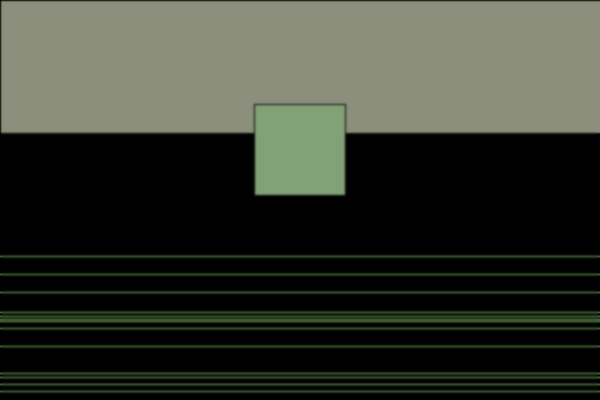

In [722]:

for i in range(1):
    img = create_geometric_art()
    display(img)

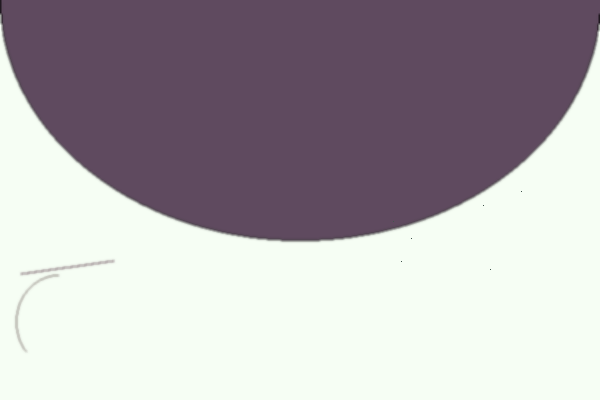

In [725]:
for i in range(1):
    img = create_caotic_art()
    display(img)